# Hubble Law Programming Assignment and IPython Introduction

We will use ipython notebooks to introduce some very basic programming concepts and allow easy data manipulation. While spreadsheet programs like excel might work for simple operations like the linear fit that Hubble did, you will quickly find yourself fundementally limited by the inflexible enviroment. Python is quickly becoming the "industry standard" used by astronomers nearly universally.

Over the course of this assignment, we will find the Hubble constant for ourselves by using some observed data. I will guide you through the basic setup, and then have you do your own hubble analysis via a different technique. If time permits, I included some extensions questions to play around with.

## Python Introduction

IPython is a tool used to make python easier to use and is particularly well suited to science since it is easy to play around with lines of code without dealing with a lot of the "logistics" nessisary with full-fledged programs. IPython allows you to incorporate text (use the markdown option above) as well as run python code. For those unfamiliar with basic python here are some examples of what you can do.

To run the code in a cell, press SHIFT+ENTER.

In [22]:
print("hello world")

hello world


In [23]:
2+3

5

Note that python has a weird way of dealing with exponentials...

In [24]:
3**2

9

In [25]:
a = 3 # you can put comments in your code by putting a # followed by your comment.
b = 2 # defining variables!
a**b # basic multiplication!

9

Python sometimes has a hard time dealing with the difference between an integer and a real number (floating point in computer language).

When in doubt, turn your integers into floats (real numbers) by putting a period after!

In [26]:
a = 3.
b = 2.
b/a #we can divide floats fine

0.6666666666666666

So now we can use this quickly to calculate cool physical quantities! Remember the formula for kinetic energy:

$ E = \frac{1}{2}mv^2 $

In [27]:
m = 10. #note that python doesn't handle units... you'll have to do that yourself seperately
v = 5.
E = 0.5 * m * v**2
print(E)

125.0


In [28]:
m = 15. #note that python doesn't handle units... you'll have to do that yourself seperately
v = 5.
E = 0.5 * m * v**2
print(E)

187.5


You could imagine though that you might want to calculate a physical quantity for a lot of different input values and want to be able to condense a lot of those equations. For that we define a function:

In [29]:
def kinetic_energy(m,v): #define what the function inputs are
    return 0.5 * m * v**2 #define what the function returns

In [30]:
print(kinetic_energy(10.,5.)) #remember that order matters; python won't figure out the order for you
print(kinetic_energy(15.,5.))

125.0
187.5


## Numpy Introduction

For scientific purposes, often one has to deal with very large datasets and lots of complex operations (things like matrix multiplication). While one could code up one's own definitions of all these functions, that would take a lot of time and they might end up running relatively slow as you might not be using all the numerical tricks you could be. For this we trust other people to write the code for us! In particular, we will use numpy. To use it we first import it!

In [31]:
import numpy as np #this allows us to reference the numpy packages as np.[function]

In [32]:
a = np.array([[10.0,4.],[1.,2.]]) #defining an array/matrix... it could be data!
a

array([[ 10.,   4.],
       [  1.,   2.]])

In [33]:
a[0] #note that arrays are "zero-indexed", the first row is called with a zero

array([ 10.,   4.])

In [34]:
a[1]

array([ 1.,  2.])

In [35]:
a[0,0] #we can call individual elements of an array with two indices

10.0

## Plotting with MatPlotLib

A picture is worth a thousand words/formulas right? Lets see how to plot things using matplotlib, another package!

In [36]:
import pylab
import matplotlib.pyplot as plt 
%matplotlib inline

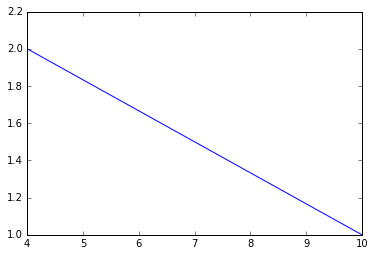

In [37]:
plt.plot(a[0],a[1]) #plottinga line with a[0] as the x coordinates and a[1] as the y coordinates

We can play around a bit with the display to make it look nicer. If you are in doubt, there are lots of examples online a quick google usually works, but also feel free to ask me/the TAs.

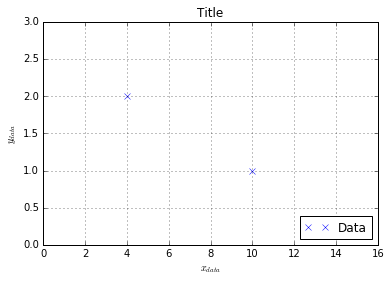

In [38]:
plt.grid() #Displays a dotted grid behind the chart
plt.xlabel("$x_{data}$") #x axis label 
plt.ylabel("$y_{data}$") #y axis label 
plt.rcParams['figure.figsize'] = (10.0, 8.0) #makes plot bigger!
plt.plot(a[0],a[1], "bx", label = "Data") #"bx" makes the displayed data be blue xs

plt.legend(loc=4)#displays legend which shows the labels
plt.ylim((0,3))#y axis range
plt.xlim((0,16)) #x axis range
plt.title("Title") #titles the plot

Your data and what you are trying to show will dictact how you want to display it!

## Hubble Data Example

Lets now apply what we have learned to Hubble's data to get a hubble constant! 

You can find his original paper here:http://apod.nasa.gov/diamond_jubilee/d_1996/hub_1929.html

In [39]:
#Data format is alsways important to remember! Here it is [Galaxy Name, velocity (km./sec), distance away (megaparsecs)]
hubble_data = np.array([[  2.78000000e+02,   6.50000000e+02,   1.52000000e+00],
       [  5.84000000e+02,   1.80000000e+03,   3.45000000e+00],
       [  9.36000000e+02,   1.30000000e+03,   2.37000000e+00],
       [  1.02300000e+03,   3.00000000e+02,   6.20000000e-01],
       [  1.70000000e+03,   8.00000000e+02,   1.16000000e+00],
       [  2.68100000e+03,   7.00000000e+02,   1.42000000e+00],
       [  2.68300000e+03,   4.00000000e+02,   6.70000000e-01],
       [  2.84100000e+03,   6.00000000e+02,   1.24000000e+00],
       [  3.03400000e+03,   2.90000000e+02,   7.90000000e-01],
       [  3.11500000e+03,   6.00000000e+02,   1.00000000e+00],
       [  3.36800000e+03,   9.40000000e+02,   1.74000000e+00],
       [  3.37900000e+03,   8.10000000e+02,   1.49000000e+00],
       [  3.48900000e+03,   6.00000000e+02,   1.10000000e+00],
       [  3.52100000e+03,   7.30000000e+02,   1.27000000e+00],
       [  3.62300000e+03,   8.00000000e+02,   1.53000000e+00],
       [  4.11100000e+03,   8.00000000e+02,   1.79000000e+00],
       [  4.52600000e+03,   5.80000000e+02,   1.20000000e+00],
       [  4.56500000e+03,   1.10000000e+03,   2.35000000e+00],
       [  4.59400000e+03,   1.14000000e+03,   2.23000000e+00],
       [  5.00500000e+03,   9.00000000e+02,   2.06000000e+00],
       [  5.86600000e+03,   6.50000000e+02,   1.73000000e+00]])

In [40]:
distances = hubble_data[:,2]
velocities = hubble_data[:,1]

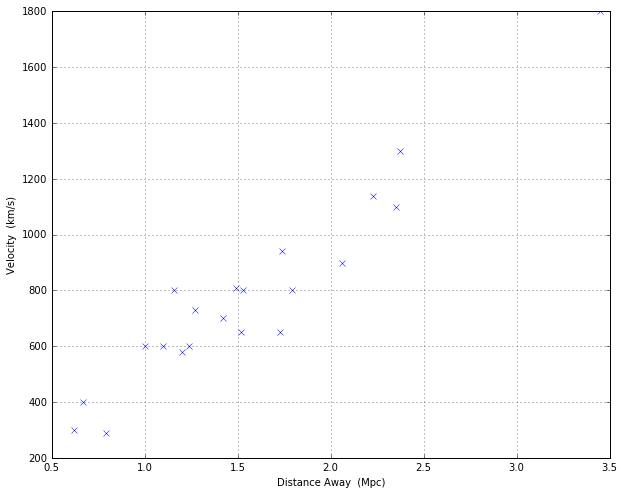

In [41]:
plt.grid() #Displays a dotted grid behind the chart
plt.xlabel("Distance Away  (Mpc)") #x axis label 
plt.ylabel("Velocity  (km/s)") #y axis label 
plt.plot(distances,velocities,"bx")

We now want to do a fit on these data points. For doing regression analysis, we use yet another standard package, scipy!

In [42]:
from scipy import stats #stats is a particular subpackage from scipy

In [43]:
slope, _, _, _, std_err = stats.linregress(distances,velocities) 
#stats returns a lot of statistics we don't really need, so it is common practice to put a "_" on variables you aren't using. 

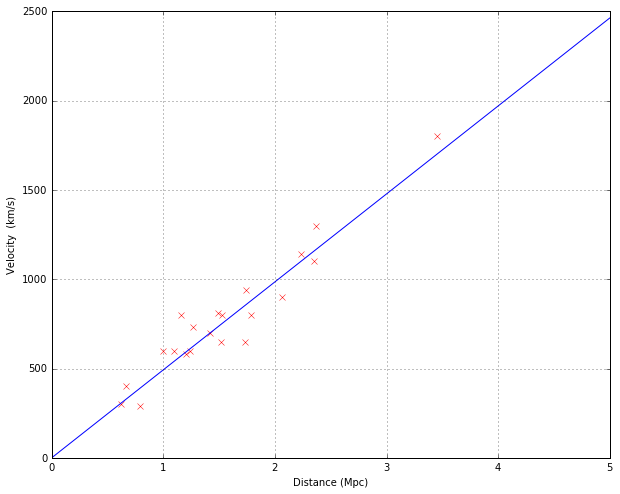

In [46]:
plt.grid() #Displays a dotted grid behind the chart
plt.xlabel("Distance (Mpc)") #x axis label 
plt.ylabel("Velocity  (km/s)") #y axis label 
plt.plot(distances,velocities,"rx", label = "Data")
plt.plot(np.array([0,5]),np.array([0,5])*slope, label = "fit")

In [45]:
slope, std_err

(492.57202426684603, 34.666181619528636)

So we get a hubble constant of 493 +/- 35 km/s / Mpc for the Hubble Constant (matching Hubble's paper)! This is significantly higher than the currently observed value of ~70 km/s / Mpc though... 

## Questions to Consider

1) How did Hubble determine the distances and velocities used in this fit?

2) Hubble didn't provide error bars on his datapoints and treats them as absolute values when doing a fit. For a more through analysis, it would be expected to weight the fit by errors on the values (values with large errors enter the fit less so than those with small errors). How might errors emerge during the calculations of the distances and velocities? How might we account for them in the fit?

3) Besides uncertainty in the actual values for the galaxies used in the analysis, how else might you make the analysis more accurate? How does the analysis that Hubble performed differ from those done by modern observational efforts?

# Assignment

Hubble primarily used cephied variables which, while accurate, cannot be seen very far away (why not?). In order to observe to high redshifts, we need to use a different standard candle. We discussed briefly in class that galaxies can be used as a standard candle via the "standard ruler" assumption (a simplification of the Tully-Fisher Relation). For this assignment we will try to find the hubble's law using this relation.

On this website you can find a nice collection of actual observations of galaxies and their spectra:

http://www.astro.washington.edu/courses/labs/clearinghouse/labs/HubbleLaw/galaxies.html

1) Click through galaxies and find some (5-15) you want to use for the assignment. In general, you'll want galaxies that have "well resolved" (not blurry or diffuse) images and spectra. Worse images mean that the result will be more sensative to how you choose the limits of the galaxies. Try to define a systematic way of choosing good images.

2) For each galaxy you select, figure out its angular size along the longest axis (you'll notice a handy tool on the website to make this easier).  Be sure to measure all the way to the faint outer edges and be consistent in your definition between all images. 

3) From this angle, find the distance to the galaxy assuming all galaxies are about 22 kpc. Record this number.

4) We now need the recession velocity of each galaxy. We will determine this by comparing the spectra of each galaxy to the known spectra of calcium and hydrogen. 

For each galaxy's spectra, notice there are two strong dips in the intensity of light at wavelengths of about 3965 angstroms and 4000 angstroms.  These are the calcium K and H absorptions.  Also note the short vertical lines labelled "Ca K" and "Ca H."  These are the laboratory measured wavelengths of the calcium K and H absorptions, the "rest wavelength." Calculate the difference in wavelength between the rest wavelength and the measured wavelength of the Ca K aborption line.  

5)Now, calculate the redshift, $z = \delta \lambda / \lambda$ where $\lambda$ is the rest wavelength for the Ca K absorption, $3933.7 Å$. 
 
Finaly, determine the recessional velocity, $v$, the speed that galaxy is moving away from us, 

$v = cz$

where $c$ is the velocity of light, 300,000 km/sec.

(For a more accurate measurement, look at the difference between other absorbtion and emmmission lines for other elements. How would you take into account these other lines?)

6) Follow the above analysis in Python (it should translate very directly) to figure out the Hubble Constant using the galaxies.

##Questions to Consider

1) What is the age of the universe according to Hubble and according to your analysis? Be sure to state your assumptions about the matter content of the universe.

2) What would be a good way to estimate the errors on your angular size observation and spectral calculation? How would these errors propogate through your analysis?

3) Throughout this assignment we assumed that galaxies are all 22 kpc. But it is actually known that galaxies grow throughout their lifetime by "accreting" (sucking up) nearby dwarf galaxies. How might this change your analysis? Are you currently under or over-estimating the hubble constant? What about the age of the universe?

##Extensions

a) Lets say that we find out that the size of a galaxy is very closely correlated to its redshift (and therefore its age). We want to include this in our analysis by assuming the following relationship between redshift and galaxy size.

$s(z) = 22.1  - 2.1 z$

Recalculate your hubble constant based on this relation.

b) Redo your calculations from the assignment with full error calculations involved. You will need to slightly modify the linear regression code to 

c) There exist "Modified Newtonian Gravity" theories that might result in changes to the hubble relation. Lets say that I develop a cosmological theory that predicts a quadratic relation between redshift and distance so the new hubble constant will be:

$cz^2 = H d$

How might you be able to test this theory? Is this theory consistent with observations?